# Datasets used in the course
/data/pandas is a Volume mount from local host

In [1]:
DATA_FOLDER = "/data/pandas"

In [2]:
%ls /data/pandas

acs_ny.csv              doctors.csv          scientists.csv
banklist.csv            doctors_unicode.csv  survey_person.csv
billboard.csv           gapminder.tsv        survey_site.csv
bladder.csv             housing.csv          survey_survey.csv
concat_1.csv            housing_renamed.csv  survey_visited.csv
concat_2.csv            output/              tesla_stock_yahoo.csv
concat_3.csv            pew.csv              weather.csv
country_timeseries.csv  raw_data_urls.txt    wine.csv


## 11.2 PYTHON’S DATETIME OBJECT

In [3]:
from datetime import datetime
t0 = datetime.now()
t0

datetime.datetime(2019, 4, 9, 19, 5, 27, 20224)

In [4]:
import os
import pandas as pd
ebola = pd.read_csv(os.path.join(DATA_FOLDER, 'country_timeseries.csv'))
ebola.iloc[0:5, 0:5]

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0

In [6]:
# Date columns is an object (str), lets convert it to a Datetime object
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [7]:
ebola['date_dt'] = pd.to_datetime(ebola.Date)
ebola.date_dt.head()

0   2015-01-05
1   2015-01-04
2   2015-01-03
3   2015-01-02
4   2014-12-31
Name: date_dt, dtype: datetime64[ns]

## 11.4 LOADING DATA THAT INCLUDE DATES

In [10]:
# Parsing dates when reading csv
ebola = pd.read_csv(os.path.join(DATA_FOLDER, 'country_timeseries.csv'), parse_dates=[0])

In [34]:
ebola['year'] = ebola['Date'].dt.year
ebola.iloc[0:5, [0, 1, 18]]

Date  Day  year
0 2015-01-05  289  2015
1 2015-01-04  288  2015
2 2015-01-03  287  2015
3 2015-01-02  286  2015
4 2014-12-31  284  2014

In [36]:
ebola['month'], ebola['day'] = (ebola['Date'].dt.month, ebola['Date'].dt.day)
ebola[['Date', 'Day', 'day', 'month', 'year']].head()

Date  Day  day  month  year
0 2015-01-05  289    5      1  2015
1 2015-01-04  288    4      1  2015
2 2015-01-03  287    3      1  2015
3 2015-01-02  286    2      1  2015
4 2014-12-31  284   31     12  2014

## 11.6 DATE CALCULATIONS AND TIMEDELTAS

In [37]:
# outbreak_d is a timedelta object
ebola['outbreak_d'] = ebola['Date'] - ebola['Date'].min()
ebola[['Day', 'outbreak_d']].head()

Day outbreak_d
0  289   289 days
1  288   288 days
2  287   287 days
3  286   286 days
4  284   284 days

## 11.7 DATETIME METHODS

In [45]:
banks = pd.read_csv(os.path.join(DATA_FOLDER, 'banklist.csv'), parse_dates=['Closing Date', 'Updated Date'])
banks.head()

Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26  
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26  
2  58302                         Whitney Bank   2017-04-28   2017-07-26  
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18  
4  19328                  State Bank of Texas   2017-01-27   2017-05-18

In [46]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
Bank Name                553 non-null object
City                     553 non-null object
ST                       553 non-null object
CERT                     553 non-null int64
Acquiring Institution    553 non-null object
Closing Date             553 non-null datetime64[ns]
Updated Date             553 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.3+ KB


In [47]:
banks['closing_quarter'], banks['closing_year'] = (
    banks['Closing Date'].dt.quarter,
    banks['Closing Date'].dt.year)
banks.head()

Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  \
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
2  58302                         Whitney Bank   2017-04-28   2017-07-26   
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18   
4  19328                  State Bank of Texas   2017-01-27   2017-05-18   

   closing_quarter  closing_year  
0                2          2017  
1                2          2017  
2                2          2017  
3                1          2017  
4                1          2017

In [55]:
closing_year = banks.groupby('closing_year').size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

In [53]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

In [54]:
import matplotlib.pyplot as plt

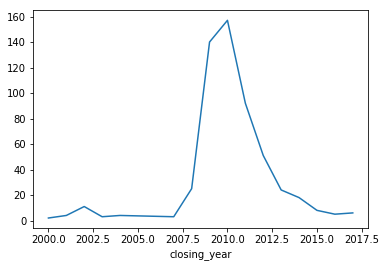

In [56]:
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

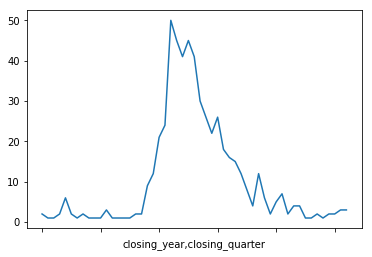

In [57]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

## 11.8 GETTING STOCK DATA

In [65]:
tesla = pd.read_csv(os.path.join(DATA_FOLDER, 'tesla_stock_yahoo.csv'), parse_dates=['Date'])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 7 columns):
Date         1791 non-null datetime64[ns]
Open         1791 non-null float64
High         1791 non-null float64
Low          1791 non-null float64
Close        1791 non-null float64
Adj Close    1791 non-null float64
Volume       1791 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 98.0 KB


In [69]:
tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)]
tesla.head()

Date       Open   High        Low      Close  Adj Close    Volume
0 2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1 2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2 2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3 2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4 2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In [71]:
tesla.index = tesla['Date']
tesla['2015'].head()

Date        Open        High         Low       Close  \
Date                                                                    
2015-01-02 2015-01-02  222.869995  223.250000  213.259995  219.309998   
2015-01-05 2015-01-05  214.550003  216.500000  207.160004  210.089996   
2015-01-06 2015-01-06  210.059998  214.199997  204.210007  211.279999   
2015-01-07 2015-01-07  213.350006  214.779999  209.779999  210.949997   
2015-01-08 2015-01-08  212.809998  213.800003  210.009995  210.619995   

             Adj Close   Volume  
Date                             
2015-01-02  219.309998  4764400  
2015-01-05  210.089996  5368500  
2015-01-06  211.279999  6261900  
2015-01-07  210.949997  2968400  
2015-01-08  210.619995  3442500

In [72]:
tesla['2015-06'].head()

Date        Open        High         Low       Close  \
Date                                                                    
2015-06-01 2015-06-01  251.410004  251.600006  247.470001  249.449997   
2015-06-02 2015-06-02  248.919998  249.399994  246.300003  248.350006   
2015-06-03 2015-06-03  248.199997  250.720001  247.009995  248.990005   
2015-06-04 2015-06-04  247.500000  249.300003  245.710007  245.919998   
2015-06-05 2015-06-05  246.000000  249.699997  245.679993  249.139999   

             Adj Close   Volume  
Date                             
2015-06-01  249.449997  2505100  
2015-06-02  248.350006  2134800  
2015-06-03  248.990005  1775500  
2015-06-04  245.919998  2453600  
2015-06-05  249.139999  3022000

In [73]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.index = tesla['ref_date']
tesla.head()

Date       Open   High        Low      Close  Adj Close  \
ref_date                                                                 
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   
7 days   2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   

            Volume ref_date  
ref_date                     
0 days    18766300   0 days  
1 days    17187100   1 days  
2 days     8218800   2 days  
3 days     5139800   3 days  
7 days     6866900   7 days

In [74]:
tesla['0 day' : '5 day'].head()

Date       Open   High        Low      Close  Adj Close  \
ref_date                                                                 
0 days   2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999   
1 days   2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000   
2 days   2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   
3 days   2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   

            Volume ref_date  
ref_date                     
0 days    18766300   0 days  
1 days    17187100   1 days  
2 days     8218800   2 days  
3 days     5139800   3 days

## 11.10 DATE RANGES

In [8]:
ebola = pd.read_csv(os.path.join(DATA_FOLDER, 'country_timeseries.csv'), parse_dates=['Date'])
# Missing record for 1st Januray 2015
ebola.iloc[:5, :5]

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0

In [11]:
# Creates a date_range index
head_range = pd.date_range(start='2014-12-31' ,end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [13]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0   
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0   
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0   
2015-01-02 2015-01-02  286           NaN         8157.0                NaN   
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2015-01-05            NaN            NaN                 NaN          NaN   
2015-01-04            NaN            NaN                 NaN          NaN   
2015-01-03            NaN            NaN                 NaN          NaN   
2015-01-02            NaN            NaN                 NaN          NaN   
2014-12-31            NaN            NaN                 NaN          NaN   

            Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
Date                                                                        
2015-01-05         NaN         1786.0             NaN              2977.0   
2015-01-04         NaN         1781.0             NaN              2943.0   
2015-01-03         NaN         1767.0          3496.0              2915.0   
2015-01-02         NaN            NaN          3496.0                 NaN   
2014-12-31         NaN         1739.0          3471.0              2827.0   

            Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
Date                                                                            
2015-01-05             NaN             NaN                  NaN           NaN   
2015-01-04             NaN             NaN                  NaN           NaN   
2015-01-03             NaN             NaN                  NaN           NaN   
2015-01-02             NaN             NaN                  NaN           NaN   
2014-12-31             NaN             NaN                  NaN           NaN   

            Deaths_Mali  
Date                     
2015-01-05          NaN  
2015-01-04          NaN  
2015-01-03          NaN  
2015-01-02          NaN  
2014-12-31          NaN

In [14]:
ebola_5.reindex(head_range)
ebola_5

Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0   
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0   
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0   
2015-01-02 2015-01-02  286           NaN         8157.0                NaN   
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2015-01-05            NaN            NaN                 NaN          NaN   
2015-01-04            NaN            NaN                 NaN          NaN   
2015-01-03            NaN            NaN                 NaN          NaN   
2015-01-02            NaN            NaN                 NaN          NaN   
2014-12-31            NaN            NaN                 NaN          NaN   

            Cases_Mali  Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  \
Date                                                                        
2015-01-05         NaN         1786.0             NaN              2977.0   
2015-01-04         NaN         1781.0             NaN              2943.0   
2015-01-03         NaN         1767.0          3496.0              2915.0   
2015-01-02         NaN            NaN          3496.0                 NaN   
2014-12-31         NaN         1739.0          3471.0              2827.0   

            Deaths_Nigeria  Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  \
Date                                                                            
2015-01-05             NaN             NaN                  NaN           NaN   
2015-01-04             NaN             NaN                  NaN           NaN   
2015-01-03             NaN             NaN                  NaN           NaN   
2015-01-02             NaN             NaN                  NaN           NaN   
2014-12-31             NaN             NaN                  NaN           NaN   

            Deaths_Mali  
Date                     
2015-01-05          NaN  
2015-01-04          NaN  
2015-01-03          NaN  
2015-01-02          NaN  
2014-12-31          NaN

## 11.11 SHIFTING VALUES

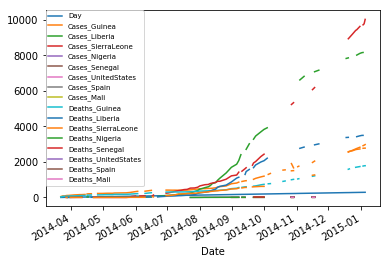

In [25]:
import matplotlib.pyplot as plt
ebola = pd.read_csv(os.path.join(DATA_FOLDER, 'country_timeseries.csv'), parse_dates=['Date'])
ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[:, 1:].plot(ax=ax)
ax.legend(fontsize=7,
          loc=2,
          borderaxespad=0.)
plt.show()

In [28]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
ebola_sub.tail()

Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN

In [31]:
ebola = pd.read_csv(os.path.join(DATA_FOLDER, 'country_timeseries.csv'),
                     index_col='Date',
                     parse_dates=['Date'])
ebola.iloc[:5, :4]

Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2015-01-05  289        2776.0            NaN            10030.0
2015-01-04  288        2775.0            NaN             9780.0
2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02  286           NaN         8157.0                NaN
2014-12-31  284        2730.0         8115.0             9633.0

In [33]:
ebola.iloc[-5:, :4]

Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                           
2014-03-27    5         103.0            8.0                6.0
2014-03-26    4          86.0            NaN                NaN
2014-03-25    3          86.0            NaN                NaN
2014-03-24    2          86.0            NaN                NaN
2014-03-22    0          49.0            NaN                NaN

In [43]:
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx = reversed(new_idx)
type(new_idx)

reversed

In [44]:
ebola = ebola.reindex(new_idx)
ebola.iloc[:5, :5]

Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                
2015-01-05  289.0        2776.0            NaN            10030.0   
2015-01-04  288.0        2775.0            NaN             9780.0   
2015-01-03  287.0        2769.0         8166.0             9722.0   
2015-01-02  286.0           NaN         8157.0                NaN   
2015-01-01    NaN           NaN            NaN                NaN   

            Cases_Nigeria  
Date                       
2015-01-05            NaN  
2015-01-04            NaN  
2015-01-03            NaN  
2015-01-02            NaN  
2015-01-01            NaN

In [45]:
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [46]:
earliest_date = ebola.index.min()
earliest_date

Timestamp('2014-03-22 00:00:00')

In [47]:
shift_values = last_valid - earliest_date
shift_values

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [48]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

In [51]:
ebola_shift = pd.DataFrame(ebola_dict)
ebola_shift.iloc[-5:, :5]

Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria
Date                                                                          
2014-03-26  4.0          86.0            8.0                2.0            1.0
2014-03-25  3.0          86.0            NaN                NaN            NaN
2014-03-24  2.0          86.0            7.0                NaN            NaN
2014-03-23  NaN           NaN            3.0                2.0            NaN
2014-03-22  0.0          49.0            8.0                6.0            0.0

## 11.13 TIME ZONES

In [54]:
import pytz
import re
regex = re.compile(r'^US')
selected_files = filter(regex.search, pytz.common_timezones)
list(selected_files)

['US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific']

In [55]:
# 7AM Eastern
depart = pd.Timestamp('2017-08-29 07:00', tz='US/Eastern')
depart

Timestamp('2017-08-29 07:00:00-0400', tz='US/Eastern')

In [56]:
arrive = pd.Timestamp('2017-08-29 09:57')
arrive

Timestamp('2017-08-29 09:57:00')

In [57]:
arrive = arrive.tz_localize('US/Pacific')
arrive

Timestamp('2017-08-29 09:57:00-0700', tz='US/Pacific')

In [58]:
arrive.tz_convert('US/Eastern')

Timestamp('2017-08-29 12:57:00-0400', tz='US/Eastern')

In [60]:
duration = arrive.tz_convert('US/Eastern') - depart
duration

Timedelta('0 days 05:57:00')